# End to end Dog vision project:
About the project:
it is a deep learning project that try to find out the doog breeds using dataset of dogs images

## 1. Problem:
I want to find out if the dog breed in the image

## 2. Data:
from kaggle:
https://www.kaggle.com/c/dog-breed-identification/overview

## 3. Evaluation:
Submissions are evaluated on **Multi Class Log Loss** between the predicted probability and the observed target.

## 4. Features:
Our features are the different photos of dog breeds
<br>🔹 almost 10,000 image for the train set </br>
🔹 almost 10,000 image for the test set


# the introduction of the instruction:
# 🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [1]:
# Importing the basic tools
import tensorflow as tf
import tensorflow_hub as hub
print("TensorFlow version:",tf.__version__)
print("TensorFlow hub version:", hub.__version__)

TensorFlow version: 2.18.0
TensorFlow hub version: 0.16.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#get my data ready
#!unzip /content/drive/MyDrive/dog-breed-identification.zip -d /content/drive/MyDrive/dog-vision

In [4]:
# Check that I am using GPU
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
labels = pd.read_csv("/content/drive/MyDrive/dog-vision/labels.csv")

In [6]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,fff43b07992508bc822f33d8ffd902ae,scottish_deerhound
freq,1,126


In [7]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
labels["breed"][labels["breed"].str.contains("^golden", regex=True)]

,breed
4,golden_retriever
25,golden_retriever
37,golden_retriever
127,golden_retriever
342,golden_retriever
...,...
9575,golden_retriever
9595,golden_retriever
9833,golden_retriever
10172,golden_retriever


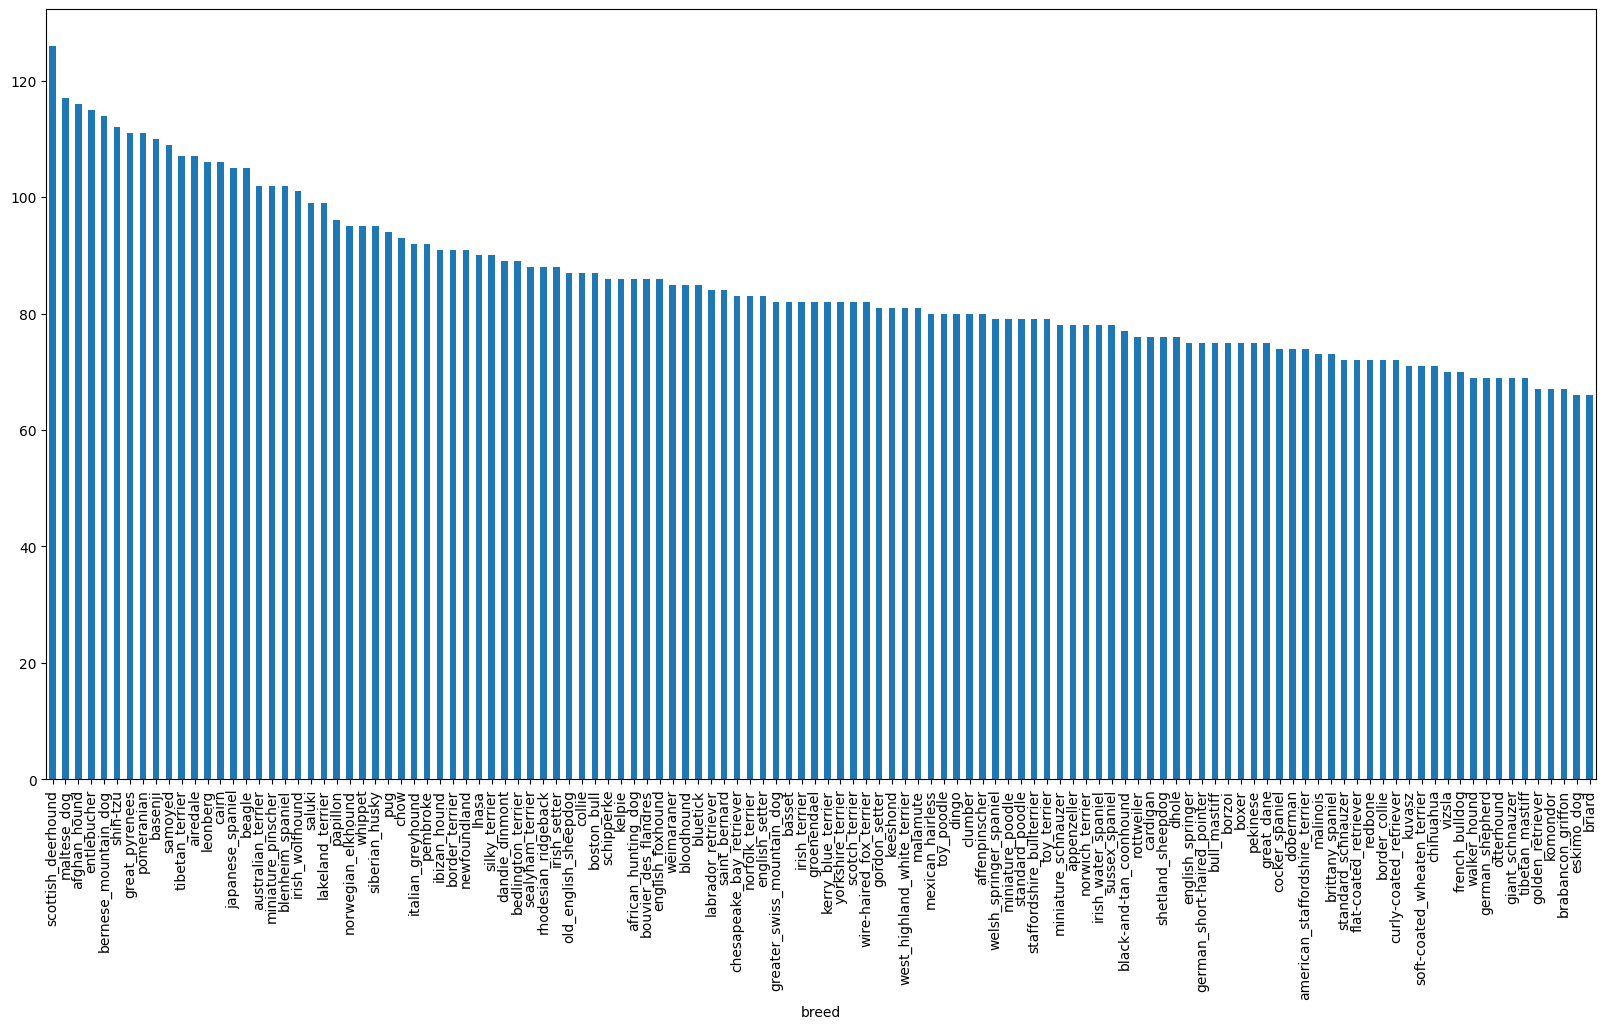

In [9]:
labels["breed"].value_counts().plot.bar(figsize=(20,10));

In [10]:
labels["breed"].value_counts().median()

82.0

In [11]:
len(labels[labels["breed"]=="scottish_deerhound"])

126

In [12]:
# get the all pathes of your X's
images_names=[]
for i in labels["id"]:
  image=f"/content/drive/MyDrive/dog-vision/train/{i}.jpg"
  #images_names.loc[:,ln(images_names)]=image
  images_names.append(image)
images_names[1:3]

['/content/drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg']

In [13]:
# Or you can use list comprehension
my_images_name=["/content/drive/MyDrive/dog-vision/train/"+image+".jpg" for image in labels["id"]]
my_images_name[:3]

['/content/drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg']

In [14]:
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


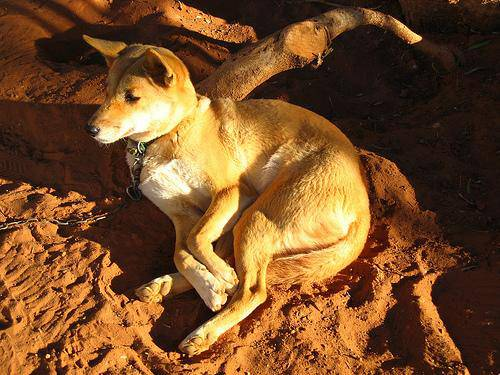

In [15]:
from IPython.display import Image
Image(my_images_name[1])

In [16]:
import os
len(os.listdir("/content/drive/MyDrive/dog-vision/train/"))

10222

In [17]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,fff43b07992508bc822f33d8ffd902ae,scottish_deerhound
freq,1,126


In [18]:
unique_labels=np.unique(labels["breed"])
len(unique_labels)

120

In [19]:
np.array(labels["breed"][0] == unique_labels)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
np.array(labels["breed"][0] == unique_labels).astype("int")

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
my_breeds_array= np.array([i == unique_labels for i in labels["breed"] ]).astype("int")
len(my_breeds_array)

10222

In [22]:
my_breeds_array[0],labels["breed"][0],unique_labels[19]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'boston_bull',
 'boston_bull')

## Split your data into train and valid sets

In [23]:
X= my_images_name
y= my_breeds_array

In [25]:
len(X)

10222

In [26]:
NUM_IMG = 1000 #@param{type:"slider",min:1000 , max:10000, step:100}

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMG],y[:NUM_IMG],test_size=0.2,random_state=42)

## Turn the images into tensors:

In [28]:
# How to read an image:
from matplotlib.pyplot import imread
image=imread(X[1])

In [34]:
# function to preprocess images:
IMG_SIZE=224
def image_processor(image_path,IMG_SIZE=IMG_SIZE):
  '''
  this function to turn your image into tensor with resizing
  and normalizing.
  '''
    # read your path:
  image=tf.io.read_file(image_path)
  #convert it into tensor:
  image=tf.image.decode_jpeg(image,channels=3)
  #Normalize your tensor:
  image=tf.image.convert_image_dtype(image,dtype=tf.float32)
  #resize your tensor:
  image=tf.image.resize(image,[IMG_SIZE,IMG_SIZE])

  return image


In [35]:
# function to get the labels and images pairs:
def my_pairs(image_path,labels):
  '''
  a function to provide the image path and its labels with a sense of pairs
  '''
  data = image_processor(image_path,IMG_SIZE)
  return data,labels


In [36]:
# the function that I will use to transfor our data into tensors to batches
# for training, evaluation and for testing
# it's very important also to shows that I already split my each set into batches
# So, I don't need to split it in the fitting process

Batch_size=23

def my_func(X=X,y=None,Batch_size=Batch_size,val=None,test=None):
  """
  it's a function to provide batches for training, validation, and testing sets

  """
  if test== True:
    print("Creating test data Batches...")
    dataset=tf.data.Dataset.from_tensor_slices(tf.constant(X)) # convert X_test into string tensors
    dataset_batchs=dataset.map(image_processor).batch(Batch_size) # split it into batches
    return dataset_batchs

  elif val==True:
    print("Creating val data Batches...")
    dataset=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) # convert X_val and y_val into string tensors
    dataset_batchs=dataset.map(my_pairs).batch(Batch_size) # split it into batches without shuffling
    return dataset_batchs
  else:
    print("Creating training data Batches...")
    dataset=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) # convert X_train and y_train into string tensors
    dataset= dataset.shuffle(len(X)) # shuffle your train data ➡️ becuase that makes the learning process more effective
    dataset_batchs=dataset.map(my_pairs).batch(Batch_size) # split it into batches
    return dataset_batchs

In [37]:
# here it is your validation data. So, no more X_val and y_val
# you have your X_val as tensors and the same thing with your y_val
val_batches= my_func(X_val,y_val,val=True)
for i in val_batches.take(1):
  print(i)

Creating val data Batches...
(<tf.Tensor: shape=(23, 224, 224, 3), dtype=float32, numpy=
array([[[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],

        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],

        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],

        ...,

   

In [38]:
# here it is your training data. So, no more X_train and y_train
# you have your X_train as tensors and the same thing with your y_train
train_batches= my_func(X_train,y_train)
for i in train_batches.take(1):
  print(i)

Creating training data Batches...
(<tf.Tensor: shape=(23, 224, 224, 3), dtype=float32, numpy=
array([[[[0.00000000e+00, 2.20588241e-02, 4.90196107e-04],
         [2.05707294e-03, 3.68697494e-02, 3.78151285e-03],
         [7.47549161e-03, 4.90371212e-02, 1.66141484e-02],
         ...,
         [2.26713605e-02, 7.72407129e-02, 3.51538584e-02],
         [4.92564216e-02, 9.58252996e-02, 5.93668073e-02],
         [4.41176491e-03, 2.79411785e-02, 5.88235352e-03]],

        [[0.00000000e+00, 3.92156877e-02, 5.39215747e-03],
         [2.01593153e-02, 6.67804629e-02, 3.29569355e-02],
         [4.51943316e-02, 8.96446109e-02, 5.76155484e-02],
         ...,
         [8.46023709e-02, 1.47531345e-01, 1.03973903e-01],
         [1.05576858e-01, 1.60969019e-01, 1.20282739e-01],
         [2.20588241e-02, 7.74509832e-02, 3.67647111e-02]],

        [[0.00000000e+00, 3.92156877e-02, 7.84313772e-03],
         [2.63305344e-02, 6.88375384e-02, 3.74649875e-02],
         [5.25472723e-02, 9.56845358e-02, 6.4311

In [39]:
train_batches.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.int64, name=None))

# Visualizing our Batchs

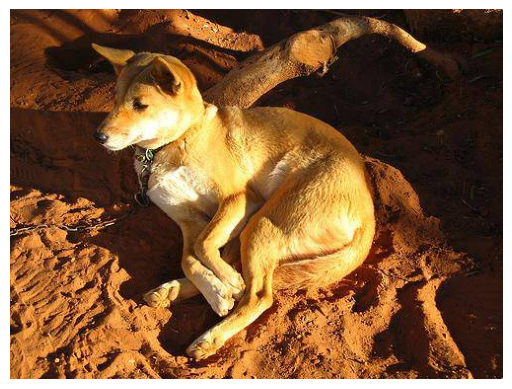

In [40]:
fig,ax = plt.subplots(1,1)
my_image= imread(X[1])
ax.imshow(my_image)
ax.axis("off");

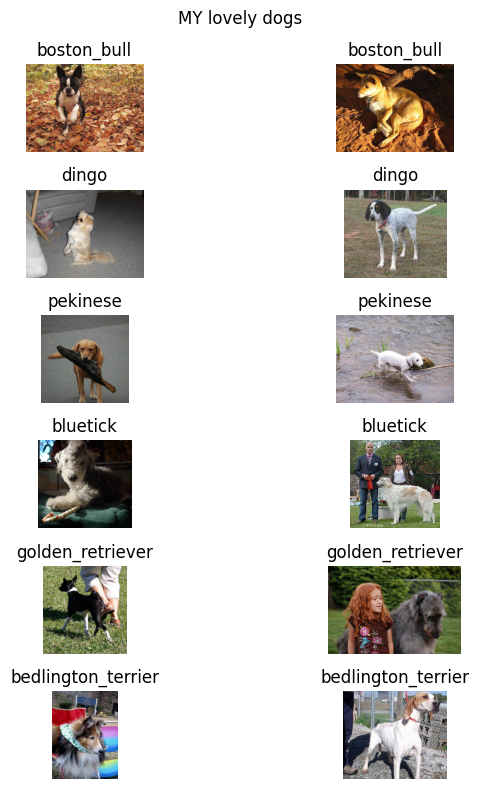

In [41]:
def my_func(number_of_images):
  fig,ax = plt.subplots(int(number_of_images/2),2,figsize=(8,8))
  my_columns = [val for _ in np.arange(number_of_images) for val in (0, 1)]
  my_rows=[i for i in np.arange(number_of_images) for i in (i,i)]
  for rows,columns,image_index in zip(my_rows,my_columns,np.arange(number_of_images)):
    #print(rows,columns)
    image=imread(X[image_index])
    ax[rows,columns].imshow(image)
    ax[rows,columns].axis("off")
    ax[rows,columns].title.set_text(labels["breed"][rows])
  plt.suptitle("MY lovely dogs")
  plt.tight_layout()
my_func(12)

# Building a model
Before we build a model, there are a few things we need to define:
- The input shape (our images shape, in the form of Tensors) to our model.
- The output shape (image labels, in the form of Tensors) of our model.
- The URL of the model we want to use.


In [42]:
import tf_keras as tfk
import tensorflow_hub as hub
# Setup input shape to the model
IMG_SIZE=224
input_shape= (IMG_SIZE,IMG_SIZE) # batch, height, width and colour channels

# Setup output shape of our model
output_shape = 120

# Setup model URL from TensorFlow Hub (Kaggle)
Model_URL="https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/050-224-classification/2"

def my_pretrained_model (input=input_shape,output=output_shape,url=Model_URL):
  model= tfk.Sequential([
      hub.KerasLayer(url,input_shape=input+(3,),trainable=False),

      tfk.layers.Dense(output,activation="softmax")])

  model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

  model.build(input)

  return model
model = my_pretrained_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1988505   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 2108745 (8.04 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 1988505 (7.59 MB)
_________________________________________________________________


## To evaluate your model:

### Using tensorboard and callbacks

In [43]:
# make a log file
import datetime
import os

# Create a function to build a TensorBoard callback

def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  log_dir = os.path.join("drive/MyDrive/dog-vision/logs",
                        datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S"))
  return tfk.callbacks.TensorBoard(log_dir=log_dir)

In [44]:
# use EarlyStopping to tell the model when to stop the task
import tf_keras as tfk
early_stopping = tfk.callbacks.EarlyStopping(monitor ="val_accuracy", patience=3)

In [45]:
num_of_epoches = 20 #@param {type:"slider", min:10, max:100, step:10}

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1988505   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 2108745 (8.04 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 1988505 (7.59 MB)
_________________________________________________________________


In [47]:
# your training model
def train_model(model, train_data, validation_data, epoches, batches=None,early_stopping = early_stopping):
    tensorboard = create_tensorboard_callback()
    model.fit(
        x=train_data,               # using the function's parameter
        validation_data=validation_data,  # using the function's parameter
        epochs=epoches,             # using the function's parameter
        batch_size=batches,
        validation_freq=1,
        callbacks=[early_stopping, tensorboard]
    )
    return model

In [48]:
model = train_model(model,train_batches,val_batches,num_of_epoches)

Epoch 1/20
35/35 [==============================] - 196s 5s/step - loss: 4.9556 - accuracy: 0.0750 - val_loss: 3.5586 - val_accuracy: 0.2150
Epoch 2/20
35/35 [==============================] - 5s 153ms/step - loss: 1.5142 - accuracy: 0.6612 - val_loss: 2.6130 - val_accuracy: 0.3750
Epoch 3/20
35/35 [==============================] - 4s 115ms/step - loss: 0.5454 - accuracy: 0.9262 - val_loss: 2.2982 - val_accuracy: 0.4150
Epoch 4/20
35/35 [==============================] - 5s 150ms/step - loss: 0.2308 - accuracy: 0.9875 - val_loss: 2.2537 - val_accuracy: 0.4000
Epoch 5/20
35/35 [==============================] - 4s 122ms/step - loss: 0.1306 - accuracy: 1.0000 - val_loss: 2.2432 - val_accuracy: 0.4350
Epoch 6/20
35/35 [==============================] - 3s 97ms/step - loss: 0.0886 - accuracy: 1.0000 - val_loss: 2.2272 - val_accuracy: 0.4200
Epoch 7/20
35/35 [==============================] - 4s 110ms/step - loss: 0.0669 - accuracy: 1.0000 - val_loss: 2.1986 - val_accuracy: 0.4550
Epoch 8/

In [51]:
predicted_data=model.predict(val_batches,verbose=1)

9/9 [==============================] - 2s 133ms/step


In [52]:
predicted_data.shape

(200, 120)

In [53]:
def the_label (your_labels,unique_labels):
  the_labels = []
  for i in np.arange(len(your_labels)):
    the_labels.append(unique_labels[np.argmax(your_labels[i])])
  return the_labels

predicted_labels = the_label(predicted_data,unique_labels)


In [55]:
# unbatch my val_data
true_images=[]
true_labels=[]
for (i,s) in val_batches.unbatch():
  true_images.append(i)
  true_labels.append(s)


In [57]:
# turn my true into images and labels:
your_true_labels= the_label(true_labels,unique_labels)

## Turning the predictions into a canva

In [124]:
def the_heightest_n_classes(n_classes,your_list,list_of_labels,number_of_image):
  listy=heapq.nlargest(n_classes, your_list[number_of_image])
  breeds = []
  accuracy_ =[]
  for i in listy:
    accuracy_.append(your_list[number_of_image][np.where(your_list[number_of_image]==i)])
    breeds.append(list_of_labels[np.where(your_list[number_of_image]==i)])
  return breeds,accuracy_


In [125]:
def draw_for_me(number_of_image,ax1,ax2,predicted_data,unique_labels,predicted_labels,true_images,your_true_labels):
  breeds,accuracies= the_heightest_n_classes(3,predicted_data,unique_labels,number_of_image)
  image = np.squeeze(true_images[number_of_image])
  ax[ax1, ax2].imshow(image)
  ax[ax1, ax2].axis('off')  # Corrected here
  if your_true_labels[number_of_image] != predicted_labels[number_of_image]:
    ax[ax1, ax2].set_title(f"{your_true_labels[number_of_image]} {np.max(predicted_data[number_of_image])*100 :0.2f} % {predicted_labels[number_of_image]}",color="red")
  else:
    ax[ax1, ax2].set_title(f"{your_true_labels[number_of_image]} {np.max(predicted_data[number_of_image])*100 :0.2f}% {predicted_labels[number_of_image]}",color="green")
  breeds = [i[0] for i in breeds]
  accuracies= [i[0] for i in accuracies]

  the_true_index= np.where(np.array(breeds) == your_true_labels[number_of_image])
  my_gray_colors = np.full((1,3),"gray",dtype="<U10")
  my_gray_colors[0, the_true_index] = "green"
  my_gray_colors = np.array(my_gray_colors)
  my_gray_colors = my_gray_colors.flatten().tolist()


  bars = ax[ax1,ax2+1].bar(breeds, accuracies,color= my_gray_colors)
  ax[ax1,ax2+1].set_xticks(np.arange(len(breeds)))
  ax[ax1,ax2+1].set_xticklabels(breeds, fontsize=8, rotation=45)
  add_labels(ax[ax1,ax2+1], bars)



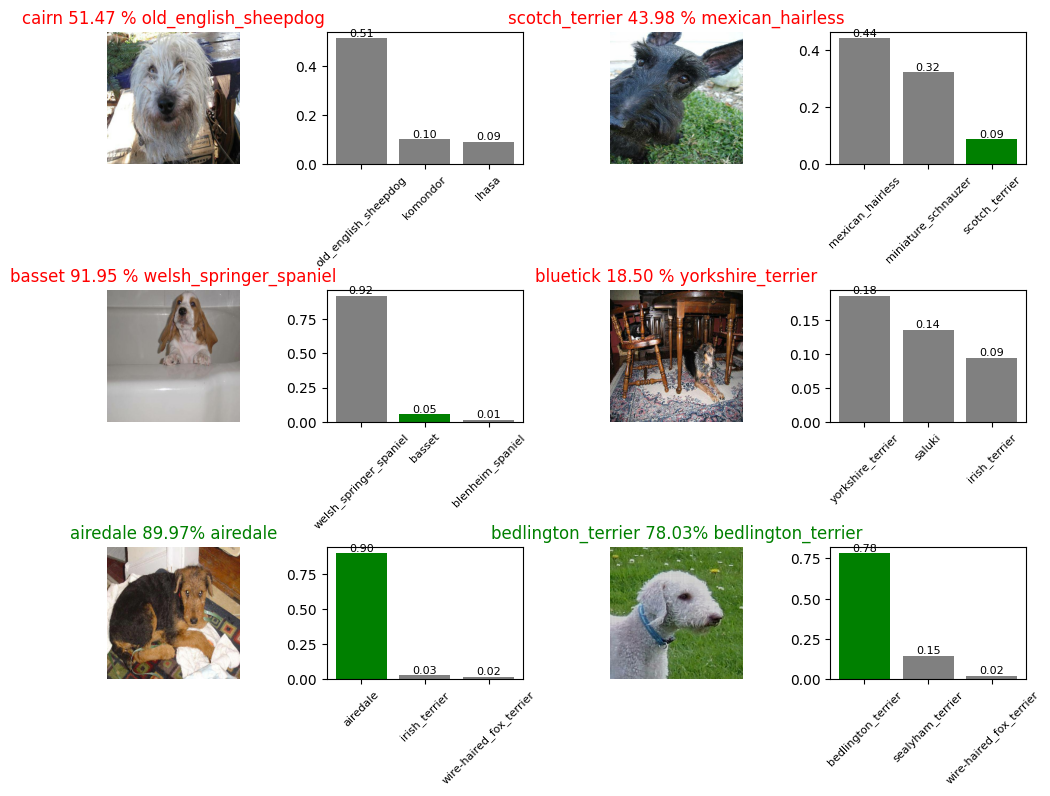

In [126]:
fig, ax = plt.subplots(3, 4, figsize=(10, 8))
draw_for_me(0,0,0,predicted_data,unique_labels,predicted_labels,true_images,your_true_labels)
draw_for_me(1,0,2,predicted_data,unique_labels,predicted_labels,true_images,your_true_labels)
draw_for_me(2,1,0,predicted_data,unique_labels,predicted_labels,true_images,your_true_labels)
draw_for_me(3,1,2,predicted_data,unique_labels,predicted_labels,true_images,your_true_labels)
draw_for_me(4,2,0,predicted_data,unique_labels,predicted_labels,true_images,your_true_labels)
draw_for_me(5,2,2,predicted_data,unique_labels,predicted_labels,true_images,your_true_labels)

plt.tight_layout()
plt.show();